# Assignment 7: FODO with Dipole & Tracking of second order moments -- Solution

<html>
<div class="alert alert-info" role="alert" style="margin-top: 10px">
In this assignment you will
    
<ul>
    <li>Create a FODO cell with dipoles inserted</li>
    <li>Tracking of $\beta$-function</li>
    <li>Tracking of second order moments and emittance</li>
    <li>Implement matched distribution</li>
</ul>
</div>
</html>

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>If you use google colab, run this cell:</strong>
    </div>
</html>

In [ ]:
# for google colab, run this cell
!git clone https://github.com/potato18z/pam1-hs2021.git
import sys
sys.path.append('./pam1-hs2021')

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
<strong>If you run it locally, run</strong>
               </div>
</html>

```bash
$ cd .../pam1-hs2021
...pam1-hs2021$ git pull
```
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
to get the updated repository.</div></html>

## Initialization
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Create the electron particle.</li>
            <li>Given the total energy of $1000MeV$, compute $\gamma$, $\beta$, $p_0$ and $B\rho.$</li>
        </ul>
    </div>
</html>

In [1]:
import numpy as np
import AcceLEGOrator.Parameter as param
from AcceLEGOrator import Electron, Constants, Physics
from AcceLEGOrator import Constants
import numpy as np

c = Constants.clight

Etot = 1000.0 # MeV

electron = Electron()

# set global variables
param.gamma_0 = Etot / electron.mass
param.mass = electron.mass # MeV / c^2
param.charge = electron.charge # e

beta0 = Physics.getBeta(param.gamma_0)

p0 = param.gamma_0 * beta0 * electron.mass   # MeV / c

Brho = p0 / param.charge * 1e6 / c # T*m

print('gamma =', param.gamma_0)
print('beta  =', beta0)
print('p     =', p0 , 'MeV/c')
print('Br    =', Brho, 'Tm')

gamma = 1956.9511835591836
beta  = 0.999999869440028
p     = 999.999869440028 MeV/c
Br    = -3.335640516480331 Tm


## Create FODO with dipole
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Instantiate a focusing quadrupole with $L = 0.2\ [m]$ and $k_1 = 3.28\ [1/m^2].$</li>
            <li>Instantiate a defocusing quadrupole with $L = 0.2\ [m]$ and $k_1 = -3.31\ [1/m^2].$</li>
        </ul>
    </div>
</html>
To instantiate a Quadrupole of length $L$ and strength $k_1$, you need to compute its gradient of the magnetic field $gradB = \frac{B}{r_0}$. Since $k_1 = \frac{q}{P_0}\frac{B}{r_0}$, we have
\begin{equation}
gradB = k_1 \cdot \frac{P_0}{q} = k_1 [1/m^2]\cdot B\rho [Tm] = k_1\cdot B\rho [T/m]
\end{equation}
from equation (34) of pam-s5.pdf. By directly using the beam rigidity, we can circumvent the unit issue.

In [2]:
from AcceLEGOrator import Quadrupole

# length [m]
Lq = 0.2

# focusing strength
k1f = 3.28

# magnetic field gradient [T/m]
gradBf = k1f * Brho

# focusing quadrupole
Qf = Quadrupole(Lq, gradBf)

print('focusing Quadrupole:', Qf)

# defocusing strength
k1d = -3.31 # 1 / m^2

# magnetic field gradient [T/m]
gradBd = k1d * Brho

# defocusing quadrupole
Qd = Quadrupole(Lq, gradBd)

print('defocusing Quadrupole:', Qd)

focusing Quadrupole: Quadrupole(L = 0.2 [m], grad B = -10.940900894055485 [T/m])

defocusing Quadrupole: Quadrupole(L = 0.2 [m], grad B = 11.040970109549896 [T/m])



<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Instantiate a dipole with $L = 1\ [m]$ and $\theta = 5\ [°].$</li>
        </ul>
    </div>
</html>
To instantiate a Dipole of length $L$ you need to compute its magnetic field $B$. From the angle $\theta$, you can compute its bending radius $\rho$ by $\rho=\frac{L}{\theta}$, then get $B$ from beam rigidity $B\rho$.

In [3]:
from AcceLEGOrator import Dipole

# length [m]
Ld = 1.0

# angle [rad]
theta = 5/180*np.pi

# bending radius [m]
rho = Ld / theta

# magnetic field [m]
B = Brho / rho

# dipole
Di = Dipole(Ld, B, 0, 0)

print('dipole:', Di)

dipole: Dipole(L = 1.0 [m], B = -0.29108954837752976 [T])



<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Instantiate a Drift of length $0.5\ [m].$</li>
        </ul>
    </div>
</html>

In [4]:
from AcceLEGOrator import Drift

# length [m]
Ldr = 0.5

# drift
Dr = Drift(Ldr)

print('drift:', Dr)

drift: Drift(L = 0.5 [m])



<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Create the cell:
                $$
                Q_f,\ D_r,\ D_i,\ D_r,\ Q_d,\ D_r,\ D_i,\ D_r
                $$
                with focusing quadrupole $Q_f$, defocusing quadrupole $Q_d$, drift $D_r$ and dipole $D_i$.
            </li>
        </ul>
    </div>
</html>

![image info](img/fodo_dipole.png)
Image taking from https://arxiv.org/pdf/1303.6514.pdf

In [5]:
cell = [Qf, Dr, Di, Dr, Qd, Dr, Di, Dr]

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Compute the total length of the beamline</li>
        </ul>
    </div>
</html>

In [6]:
length = Qf.length + 4 * Dr.length + 2 * Di.length + Qd.length

print('Total length:', length, 'm')

Total length: 4.4 m


## Tracking of $\beta$-Functions

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ol>
            <li>Calculate the initial Twiss parameters as in the last assignment.
            <li>Track the Twiss parameters and store each state.</li>
        </ol>
    </div>
</html>

In [7]:
from numpy import linalg as la

def get_twiss_initial(M_OTM_2x2):
    eigenvalues, P = la.eig(M_OTM_2x2)
    P=P/((la.det(P)*1j)**(1/len(P))) # normalize P such that la.det(P)=-1j
    print(la.det(P))
    D=np.diag(eigenvalues)
    # Compute beta and alpha
    beta=np.real(P[0,0]**2*2)
    alpha=-np.real(P[1,0]*np.sqrt(2*beta))
    return alpha, beta

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ol>
            <li>Calculate $M_{cell}$ by doing matrix multiplication.
        </ol>
    </div>
</html>

In [8]:
M_cell = cell[0]
for M in cell[1:]:
    M_cell = M * M_cell
print(M_cell)

[[-2.34511675  7.11247379  0.          0.          0.          0.50009103]
 [-0.913737    2.34484295  0.          0.          0.          0.23714329]
 [ 0.          0.          0.51656223  1.3592143   0.          0.        ]
 [ 0.          0.         -0.9320892  -0.51670245  0.          0.        ]
 [ 0.09917702 -0.5140405   0.          0.          1.         -0.02544721]
 [ 0.          0.          0.          0.          0.          1.        ]]


In [9]:
# for x plane
ax0, bx0 = get_twiss_initial(M_OTM_2x2=M_cell[0:2,0:2])
gx0 = (1 + ax0**2) / bx0
print ('alpha_x0   =', ax0)
print ('beta_x0    =', bx0)
print ('gamma_x0    =', gx0)

# for y plane
ay0, by0 = get_twiss_initial(M_OTM_2x2=M_cell[2:4,2:4])
gy0 = (1 + ay0**2) / by0
print ('alpha_y0   =', ay0)
print ('beta_y0    =', by0)
print ('gamma_y0    =', gy0)

-1j
alpha_x0   = -2.344979871155257
beta_x0    = 7.112473855856969
gamma_x0    = 0.9137370101925362
(-5.551115123125784e-17-1.0000000000000002j)
alpha_y0   = 0.516632341704955
beta_y0    = 1.359214299643772
gamma_y0    = 0.9320892053795944


<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ol>
            <li>Track the Twiss parameters for $n_{cells}=3$ by
                \begin{equation}
J_u(s_1) = M_u(s_0, s_1)\cdot J_u(s_0)\cdot M_u^T(s_0, s_1),
\end{equation}
where
\begin{equation}
J_x(s) = 
\begin{pmatrix}
\beta_x(s) & -\alpha_x(s)\\
-\alpha_x(s) & \gamma_x(s)
\end{pmatrix},
J_y(s) = 
\begin{pmatrix}
\beta_y(s) & -\alpha_y(s)\\
-\alpha_y(s) & \gamma_y(s)
\end{pmatrix}
\end{equation}
                
and $M_x$, $M_y$ are the $2\times2$ sub-matrices of the $6\times6$ transfer matrix $M$.
</ol>
</div>
</html>

In [10]:
# initial container of the twiss parameters
twiss = [[ax0, bx0, gx0, ay0, by0, gy0]]

Jx = np.matrix([[bx0, -ax0],
               [-ax0, gx0]]) # submatrix in x plane
Jy = np.matrix([[by0, -ay0],
               [-ay0, gy0]]) # submatrix in y plane

# initial container of lengths of elements
length_till_now = 0.
lengths = [0,]
n_cells = 4
for i in range(n_cells):
    for M in cell:
        # TODO: length
        length_till_now = length_till_now + M.length
        lengths.append(length_till_now)
    
        # TODO: propagate
        Mx = M[0:2, 0:2]
        My = M[2:4, 2:4]
        Jx = Mx * Jx * Mx.T
        Jy = My * Jy * My.T
    
        # TODO: extract Twiss from Jx and Jy
        # a_x, b_x, g_x,
        # a_y, b_y, g_y
        t = [-Jx[0,1], Jx[0,0], Jx[1,1],
             -Jy[0,1], Jy[0,0], Jy[1,1]]
    
        # collect all twiss
        twiss = np.append(twiss, t)
    
twiss = np.reshape(twiss, (len(cell)*n_cells+1, 6))

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Plot $\beta_x$ (in black) and $\beta_y$ (in red).</li>
        </ul>
    </div>
</html>

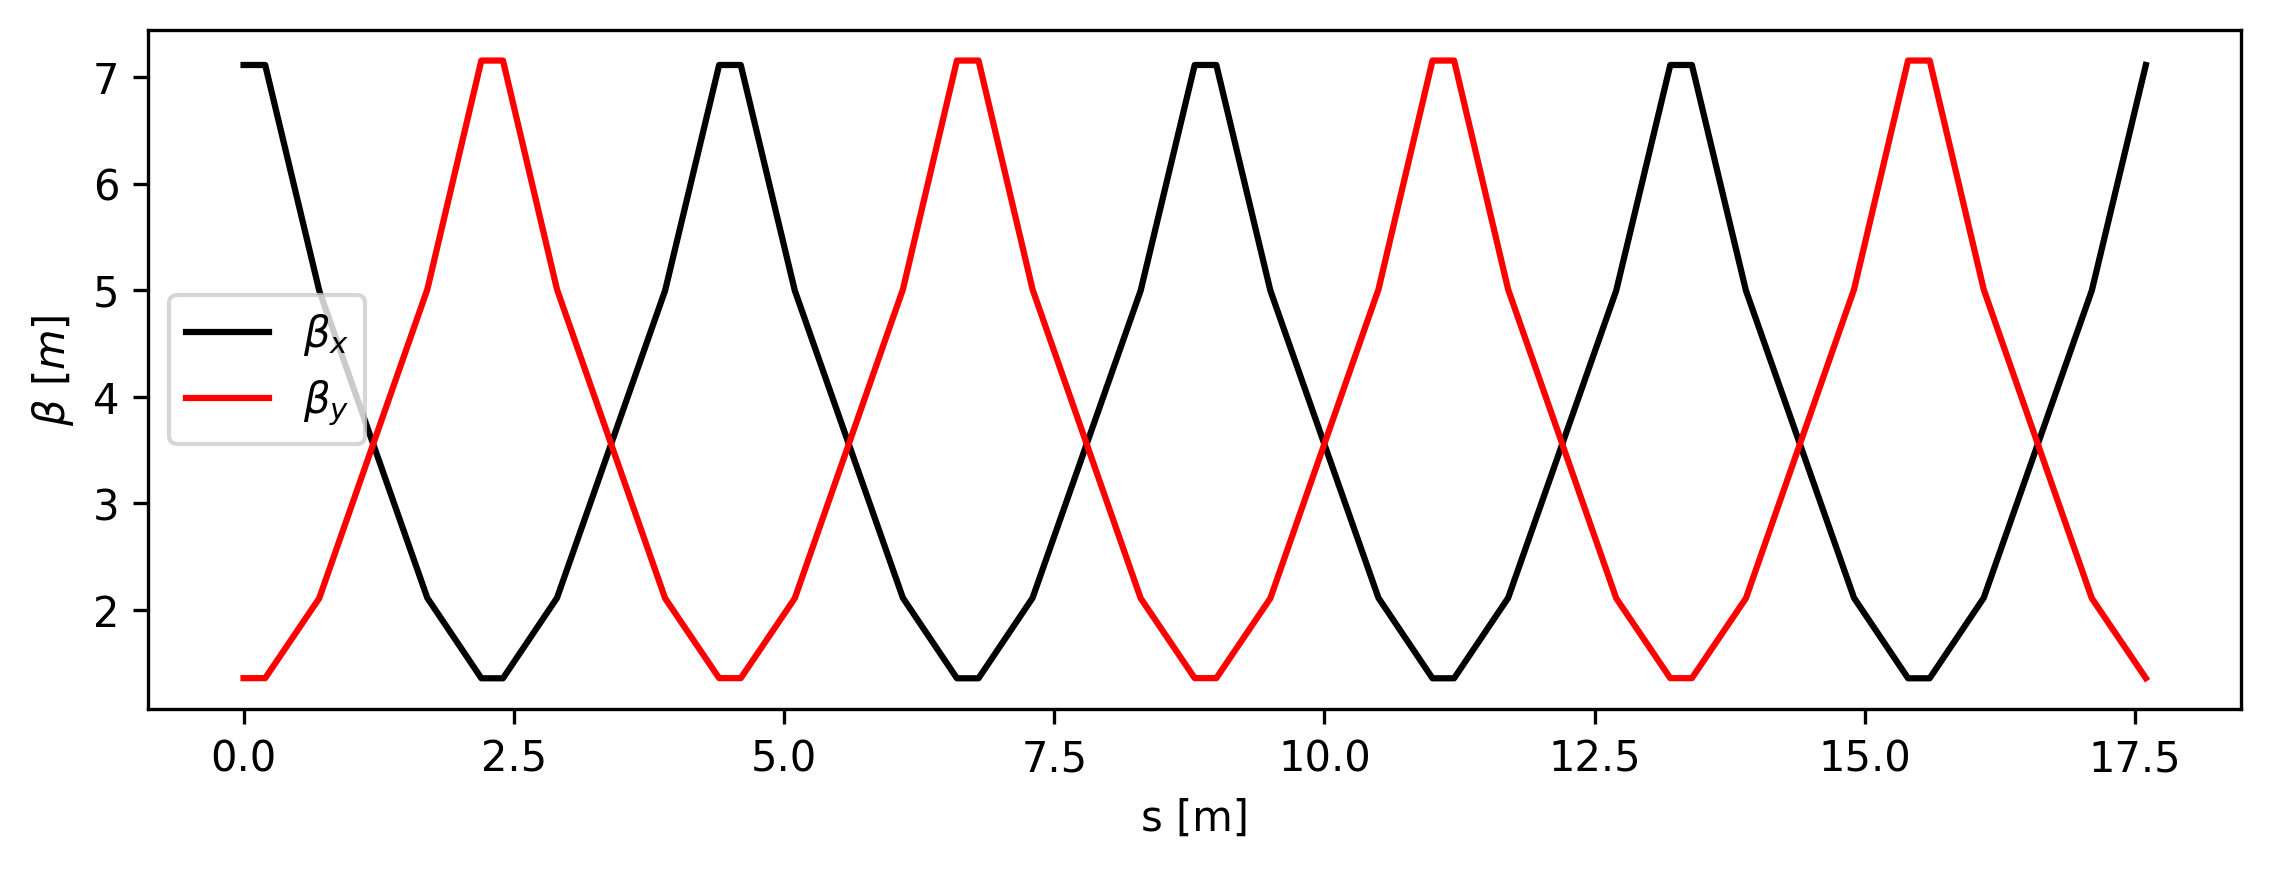

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=300)
fig.set_size_inches(9,3)
axis = fig.add_subplot(111)
axis.set_xlabel('s [m]')
axis.set_ylabel(r'$\beta\ [m]$')

axis.plot(lengths, twiss[:, 1], label=r'$\beta_x$', color='black')
axis.plot(lengths, twiss[:, 4], label=r'$\beta_y$', color='red')
axis.legend()

plt.show()

## Tracking of second order moments
Instead of tracking particles we might also track the second order moments of the distribution, i.e. the $\sigma$-matrix.

\begin{equation}
    \sigma(s_1) = R\cdot\sigma(s_0)\cdot R^T
\end{equation}
where $R$ is the transfer matrix.

In [12]:
from AcceLEGOrator import Gaussian, Bunch
import AcceLEGOrator.Parameter as param
import numpy as np

mu = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
C  = np.array([[ 1.0, 0.01,  0,  0,  0, 0],
               [ 0.01, 0.01, 0,  0,  0, 0],
               [ 0,  0, 1.0,  0.01,  0, 0],
               [ 0,  0, 0.01, 0.01,  0, 0],
               [ 0,  0,  0,  0, 1.0, 0.0],
               [ 0,  0,  0,  0,  0.0, 0.001]])
Distr = Gaussian(mu, C)

bunch = Bunch()
bunch.create(distribution = Distr, N = 10000,
             ptype = electron, ekin = Etot - electron.mass)

print(bunch)

***************************************************
Bunch information:
         #particles:		10000
          particle type:		Electron
***************************************************


### Sigma-Matrix

The $\sigma$-matrix or $\Sigma$-matrix is given by
$$\sigma_{ij} = \mathbb{E}\left[(\mathbf{x}_i - \mu_i)(\mathbf{x}_j - \mu_j)\right]=
\begin{pmatrix}
\langle x^2\rangle & \langle xx'\rangle & \langle xy\rangle & \langle xy'\rangle & \langle xz\rangle & \langle xz'\rangle \\
\langle xx'\rangle & \langle x'^2\rangle & \langle x'y\rangle & \langle x'y'\rangle & \langle x'z\rangle & \langle x'z'\rangle \\
\langle xy\rangle & \langle x'y\rangle & \langle y^2\rangle & \langle yy'\rangle & \langle yz\rangle & \langle yz'\rangle \\
\langle xy'\rangle & \langle x'y'\rangle & \langle yy'\rangle & \langle y'^2\rangle & \langle y'z\rangle & \langle y'z'\rangle \\
\langle xz\rangle & \langle x'z\rangle & \langle yz\rangle & \langle y'z\rangle & \langle z^2\rangle & \langle zz'\rangle \\
\langle xz'\rangle & \langle x'z'\rangle & \langle yz'\rangle & \langle y'z'\rangle & \langle zz'\rangle & \langle z'^2\rangle \\
\end{pmatrix}.
$$ where the mean is $\mu=0$ (as usual). 
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Write the following function to compute $\sigma$.</li>
        </ul>
    </div>
</html>

In [13]:
# --------------------------------------------
# compute the sigma matrix
# @param particles (6 x N)-dimensional matrix.
# The state is given by (x, x', y, y', z, z')
# @returns the (6 x 6) covariance matrix
# --------------------------------------------
def getMoments(particles):        
    mean_state = np.zeros((6))
    sigma = np.zeros(shape = (6, 6))
    for i in range(0, 6):
        mean_state[i] = np.mean(particles[i, :])
        for j in range(i, 6):
            sigma[i, j] = \
            sigma[j, i] = np.mean((particles[i,:]-mean_state[i])*(particles[j,:]-mean_state[j]))
        
    return sigma

*Actually, `np.cov(bunch.particles)` would give you the same result.*

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Propagate the $\sigma$-matrix.</li>
        </ul>
    </div>
</html>

In [14]:
sigma = getMoments(bunch.particles)
# initial rms beam size
sigmax = [np.sqrt(sigma[0, 0])]
sigmay = [np.sqrt(sigma[2, 2])]

for i in range(n_cells):
    for M in cell:
        # TODO: propagate
        sigma = M * sigma * M.T
    
        # append data
        sigmax.append(np.sqrt(sigma[0, 0]))
        sigmay.append(np.sqrt(sigma[2, 2]))

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Execute the cell below. It plots the envelope in horizontal and vertical direction.</li>
        </ul>
    </div>
</html>

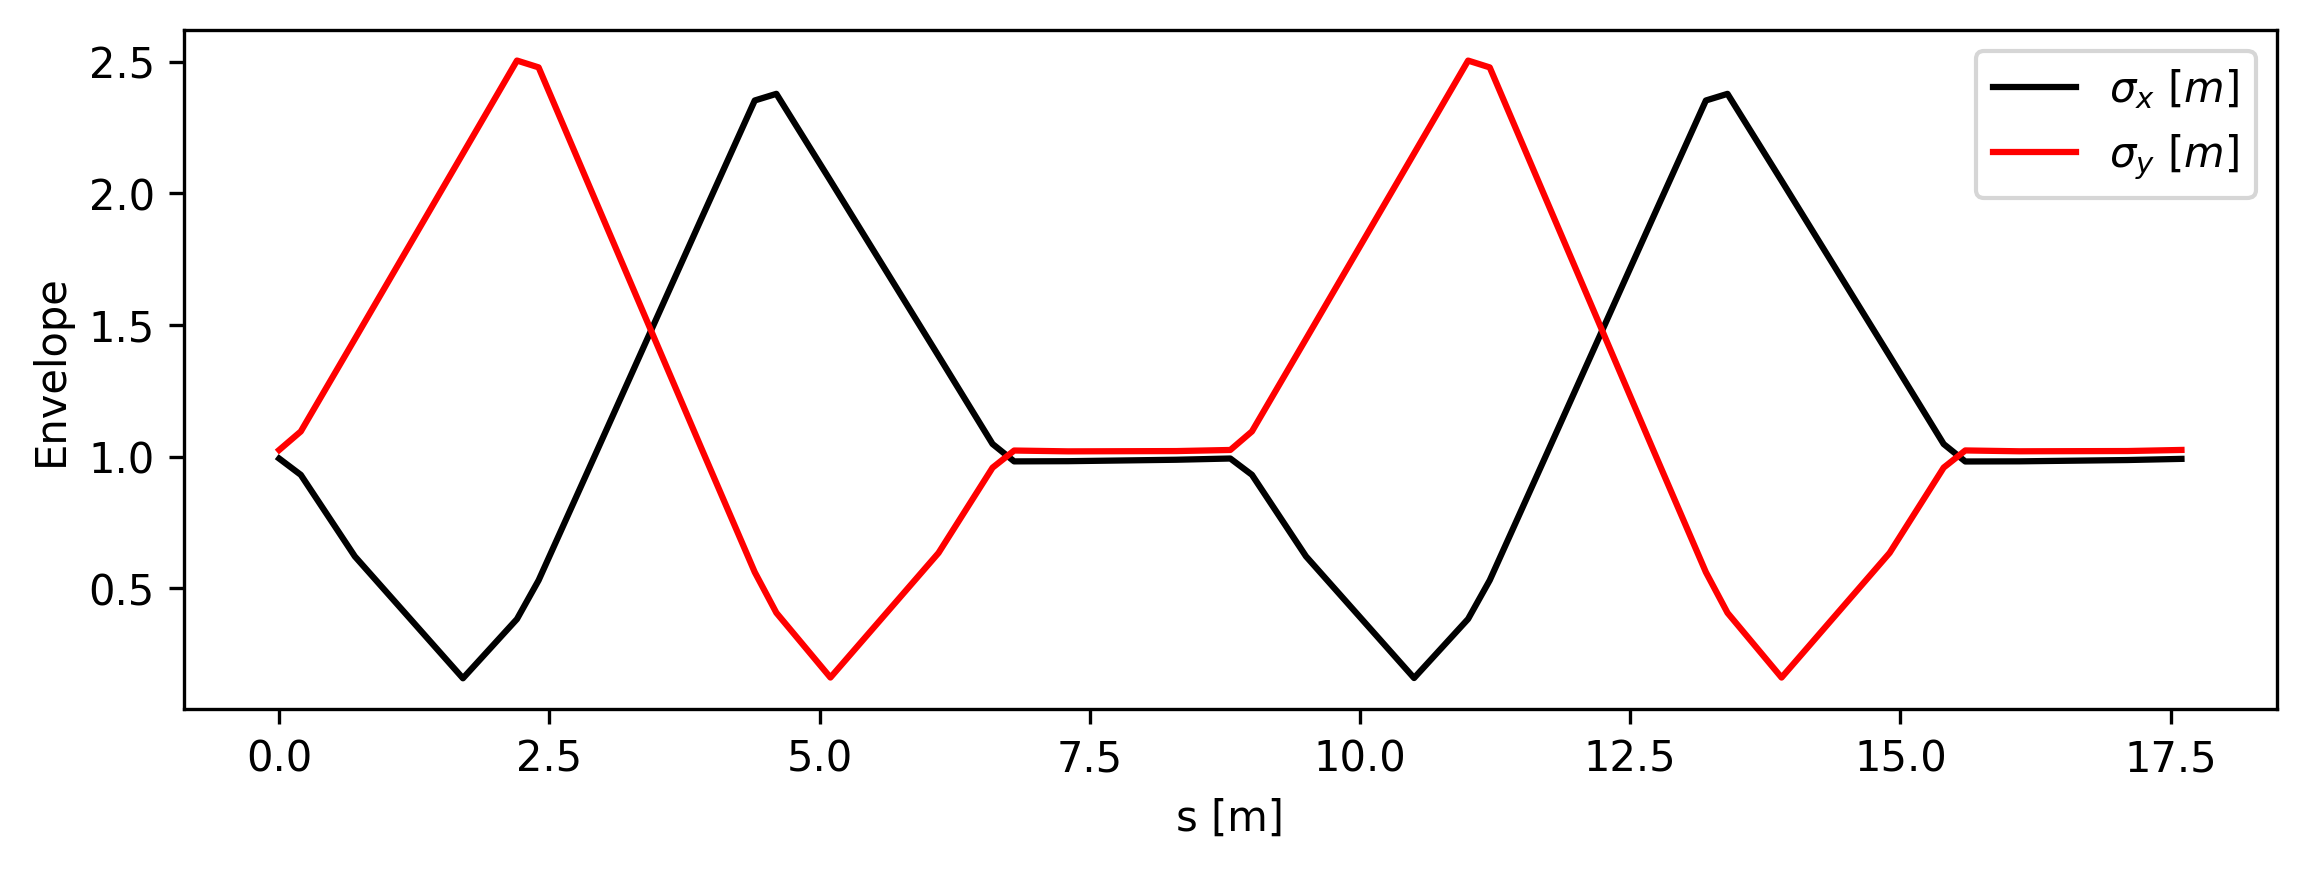

In [15]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,3)
axis = fig.add_subplot(111)
axis.set_xlabel('s [m]')
axis.set_ylabel('Envelope')

axis.plot(lengths, sigmax, label=r'$\sigma_x\ [m]$', color='black')
axis.plot(lengths, sigmay, label=r'$\sigma_y\ [m]$', color='red')

axis.legend()

plt.show()

### Emittance
The emittance is defined by
$$
\varepsilon_w = \sqrt{\langle w^2\rangle\langle w'^2\rangle - \langle ww'\rangle^2}
$$
where $w\in\{x, y, z\}$. 
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Complete the function below that returns the emittance from $\sigma$.</li>
        </ul>
    </div>
</html>

In [16]:
def emittance(sigma):
    x2    = sigma[0, 0]
    px2   = sigma[1, 1]
    xpx   = sigma[0, 1]
    emitx = np.sqrt(x2 * px2 - xpx * xpx)
    
    y2    = sigma[2, 2]
    py2   = sigma[3, 3]
    ypy   = sigma[2, 3]
    emity = np.sqrt(y2 * py2 - ypy * ypy)
    
    z2    = sigma[4, 4]
    pz2   = sigma[5, 5]
    zpz   = sigma[4, 5]
    emitz = np.sqrt(z2 * pz2 - zpz * zpz)
    
    return [[emitx, emity, emitz]]

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Track the $\sigma$-matrix again and compute the emittances.</li>
        </ul>
    </div>
</html>

In [17]:
# re-initialize sigma
sigma = getMoments(bunch.particles)

# initialize emittance
emit = emittance(sigma)
for i in range(n_cells):
    for M in cell:
        # propagate sigma matrix
        sigma = M * sigma * M.T
    
        # evaluate the emittances
        e = emittance(sigma)
    
        # append the data
        emit = np.append(emit, e, axis=0)

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Use the following function to plot emittances.</li>
        </ul>
    </div>
</html>

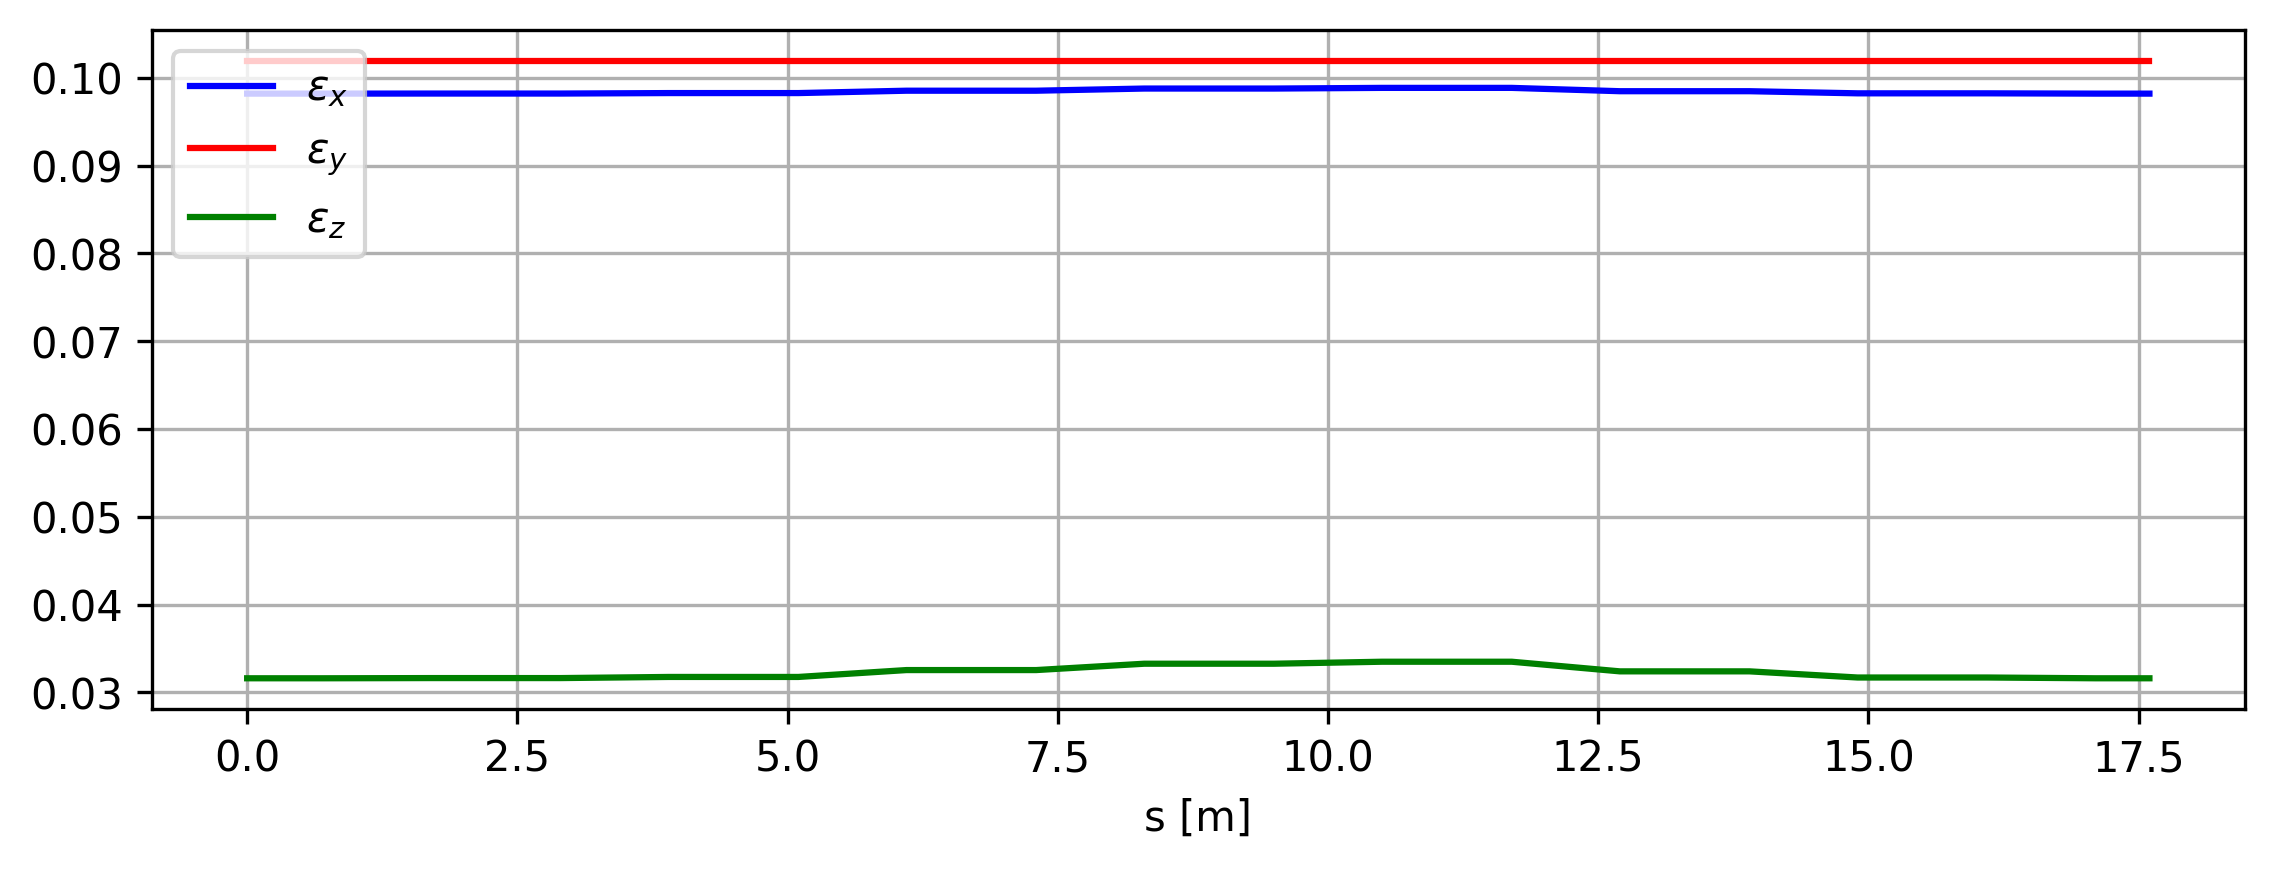

In [18]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,3)
axis = fig.add_subplot(111)

colors = ['blue', 'red', 'green']
labels = [r'$\epsilon_{x}$', r'$\epsilon_{y}$', r'$\epsilon_{z}$']
for i in range(3):
    axis.plot(lengths, emit[:, i], colors[i], label = labels[i])
    axis.set_xlabel('s [m]')
    axis.grid()
    axis.legend(loc='upper left')
plt.show()

## Matched distribution

According to equation (9) of pam-s6-2, we find that the $\sigma$ matrix of a matched distribution is just our $J_x$ and $J_y$ matrices multiplying the rms emittance (since the initial twiss parameters are calculated from the matrix $\bar{P}$).
$$
\sigma_{x(2\times2)} = \begin{pmatrix} \bar{\beta_x}\epsilon_{rms,x} & -\bar{\alpha_x}\epsilon_{rms,x} \\
\bar{-\alpha_x}\epsilon_{rms,x} & \bar{\gamma_x}\epsilon_{rms,x}
\end{pmatrix} = 
\begin{pmatrix} \beta_{x,0}\epsilon_{rms,x} & \alpha_{x,0}\epsilon_{rms,x} \\
-\alpha_{x,0}\epsilon_{rms,x} & \gamma_{x,0}\epsilon_{rms,x}
\end{pmatrix} = J_{x,0}\cdot \epsilon_{rms,x}
$$
The $\bar{\alpha_x}$ etc. in the slides are expected to refer to our initial twiss parameter values $\alpha_{x,0}$ etc. We ignore the longitudinal direction.
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Construct the $\sigma$ matrix for matched distribution.</li>
        </ul>
    </div>
</html>

In [19]:
Jx = np.matrix([[bx0, -ax0],
               [-ax0, gx0]]) # submatrix in x plane
Jy = np.matrix([[by0, -ay0],
               [-ay0, gy0]]) # submatrix in y plane
emsx = emit[0, 0]
emsy = emit[0, 1]

sigma_matched = np.zeros((6,6))
sigma_matched[0:2, 0:2] = Jx*emsx
sigma_matched[2:4, 2:4] = Jy*emsy

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Track and plot the $\sigma$ matrix as above, check that $\sigma_x$ and $\sigma_y$ are periodic.</li>
        </ul>
    </div>
</html>

In [20]:
# initial rms beam size
sigmax_matched = [np.sqrt(sigma_matched[0, 0])]
sigmay_matched = [np.sqrt(sigma_matched[2, 2])]

for i in range(n_cells):
    for M in cell:
        # TODO: propagate
        sigma_matched = M * sigma_matched * M.T
    
        # append data
        sigmax_matched.append(np.sqrt(sigma_matched[0, 0]))
        sigmay_matched.append(np.sqrt(sigma_matched[2, 2]))

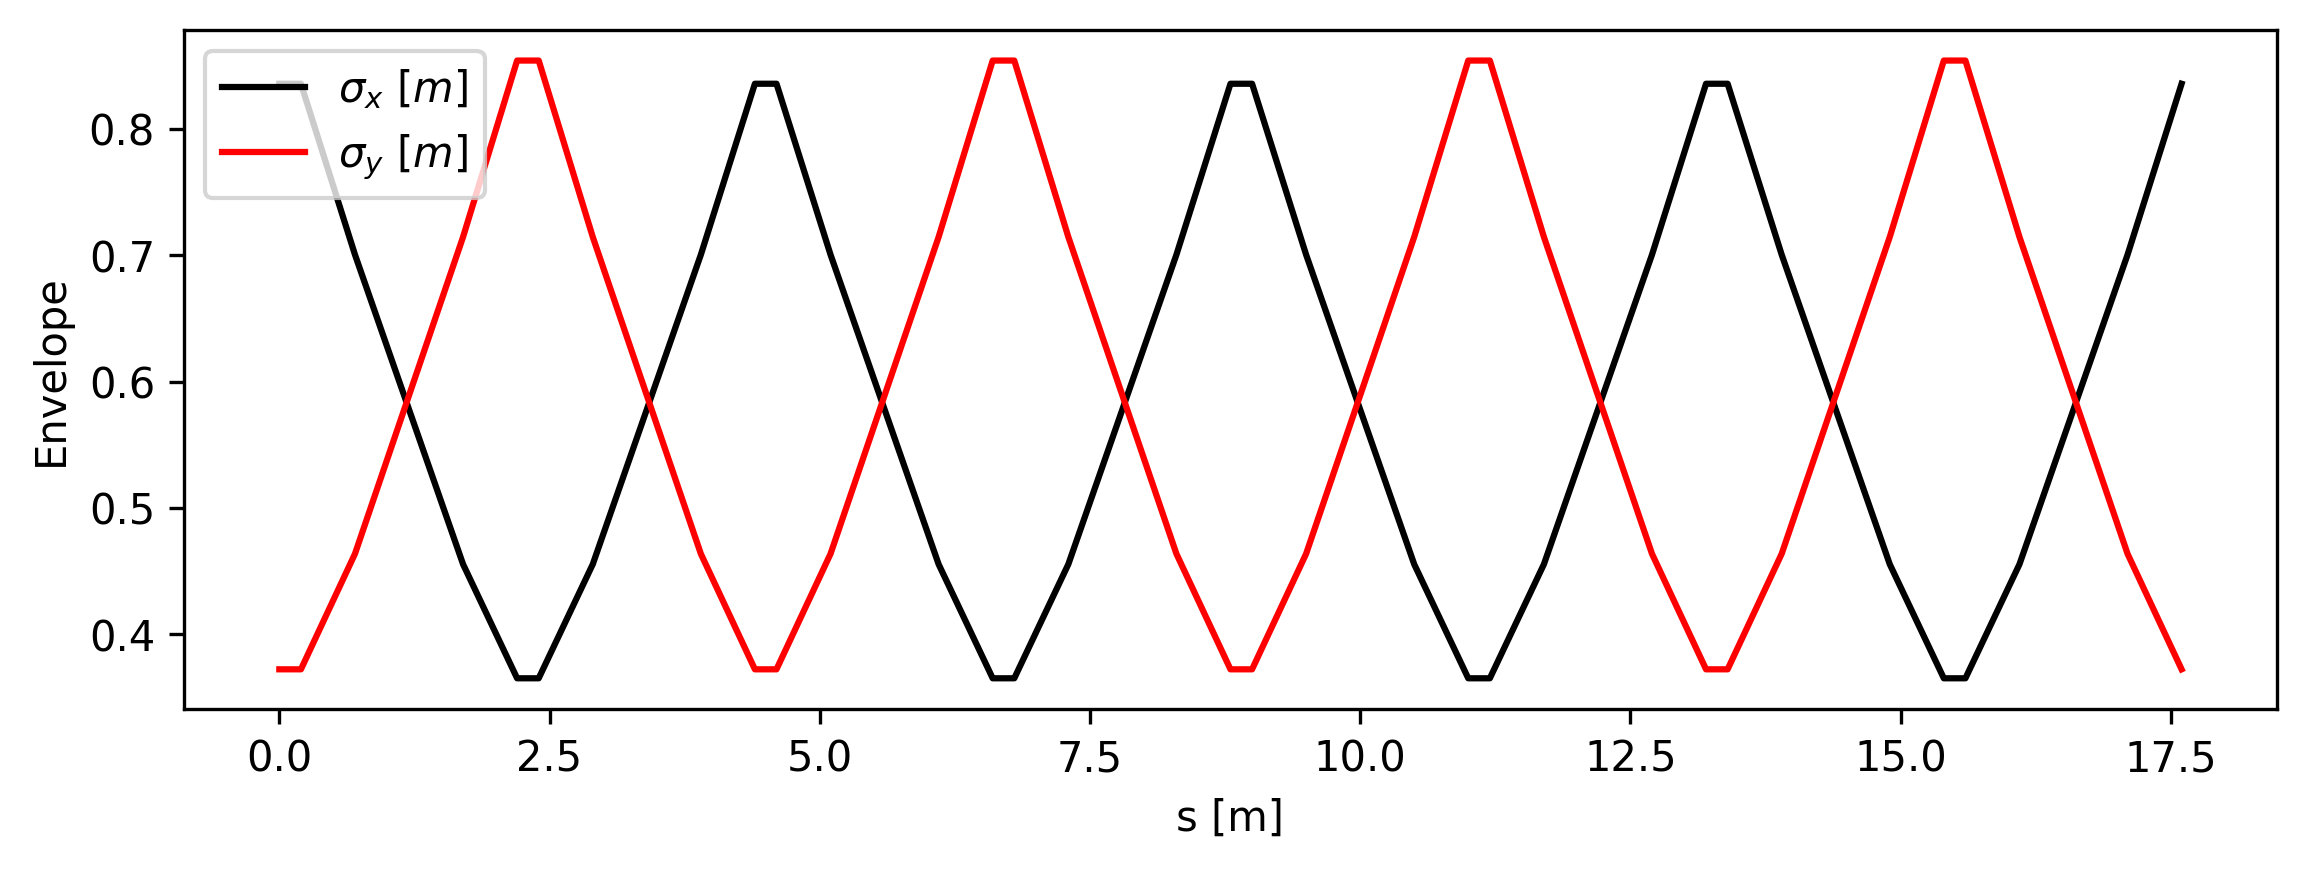

In [21]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,3)
axis = fig.add_subplot(111)
axis.set_xlabel('s [m]')
axis.set_ylabel('Envelope')

axis.plot(lengths, sigmax_matched, label=r'$\sigma_x\ [m]$', color='black')
axis.plot(lengths, sigmay_matched, label=r'$\sigma_y\ [m]$', color='red')

axis.legend(loc='upper left')

plt.show()